# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리, 데이터 준비

In [1]:
# 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# 데이터 블러오기
# 동일 경로에 "train.csv"가 있는 경우

titanic_df = pd.read_csv("./train.csv")

## 1. 분석의 목적과 변수 확인

- 타이타닉 호에서 생존한 생존자들은 어떤 사람들일까?

In [3]:
# 상위 5개 데이터 확인하기

titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Cabin 에 결측치(NaN)가 존재하는 것에 유의!
  - 결측치가 의미하는 바에 따라 처리해주어야 함.

In [33]:
# 각 Column의 데이터 타입 확인하기

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

📌  
**수치형 데이터** 요약 보기 
- `DataFrame.describe()`
- 수치형 데이터만 요약해주기 때문에 Name, Ticket 와 같은 object 자료형은 제공하지 않는다!

In [34]:
# 데이터 전체 정보를 얻는 함수 : .describe()

titanic_df.describe() # 수치형 데이터에 대한 요약만을 제공!

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


count 개수 / mean 평균 / std 표준편차 / min 최소 / Q 백분위 / max 최대

👉 데이터 살펴보기
- PassengerId
  - 인덱스이기 때문에 큰 의미가 없다.
- Survived
  - 0, 1로 구성되어있는 이진데이터
  - (예상) 평균이 0.5보다 작기 때문에 생존하지 못한사람이 더 많을 것이다.
- Pclass
  - 범주형 데이터이기 때문에 큰 의미를 가지지 않는다.
- Age
  - 평균 29.5, 표준편차 14.5, 최소나이 0.4, 최대나이 80
- SibSp
  - 최대 8 (대가족?이려나...)
- Parch
  - 최대 6 (대가족?이려나...)
- Fare
  - (예상) 평균 32.2, 표준편차 49 인데, 최소가 0이고 최대가 512인 것은 차이가 너무 크므로 이상점(outlier)라고 볼 수 있다.

📌  
상관계수 확인
- `DataFrame.corr()`
- $x_1$와 $x_2$의 상관관계

In [35]:
# 상관계수 확인!

titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


👉 데이터 살펴보기

- Pclass - Fare
  - 높은 등급(값이 낮음)일수록 요금이 비쌀 수 있다.
- Pclass - Survived
  - 높은 등급의 사람들의 생존율이 더 높을 수 있다.
  
🔥 Correlation is NOT Causation
- 상관성 : A가 올라갈수록 B가 올라감
- 인과성 : A로 인해 B가 됨.

인과가 아니므로 높은 등급인 사람의 생존률이 높다고 무조건 단정하면 안됨!

📌  
결측치 확인
- `DataFrame.isnull()`
- 통계함수 (`sum()`)를 이용하면 보기 편하다.

In [37]:
# 결측치 확인

titanic_df.isnull().sum()
# Age, Cabin, Embarked에서 결측치 발견!

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

👉 결측치를 어떻게 처리할 지 정해야함!
- 특정 값으로 대체할지
- 하나의 데이터로 판단할지
- 제거할지

## 3. 데이터의 개별 속성 파악하기

### I. Survived Column

In [45]:
# 생존자, 사망자 수는?

titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

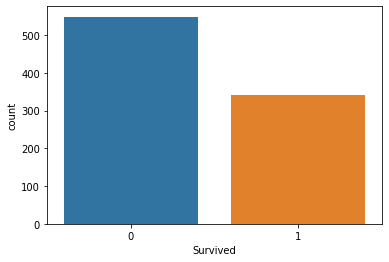

In [50]:
# 생존자 수, 사망자 수를 Barplot으로 그려보기 sns.countplot()

sns.countplot(x='Survived', data=titanic_df)
plt.show()

### II. Pclass

In [56]:
# Pclass에 따른 인원 파악

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [65]:
# Pclass 별 생존자 인원은?

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [72]:
# 전체 인원 대비 Pclass 별 생존자 비율은?

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


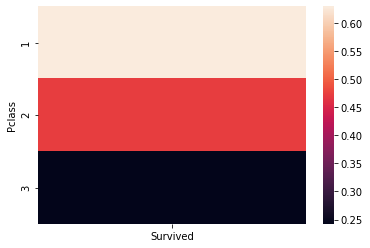

In [74]:
# 히트맵 활용

sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.show()

### III. Sex

In [77]:
titanic_df.groupby(['Survived', 'Sex']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Sex                                                                  
0        female           81      81    81   64     81     81      81    81   
         male            468     468   468  360    468    468     468   468   
1        female          233     233   233  197    233    233     233   233   
         male            109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Survived Sex                      
0        female      6        81  
         male       62       468  
1        female     91       231  
         male       45       109

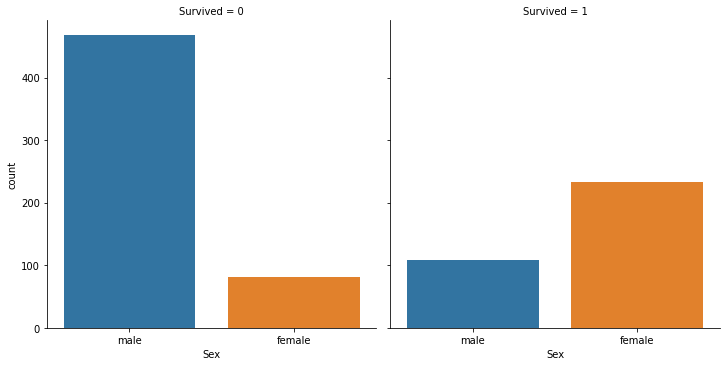

In [81]:
# sns.catplot

sns.catplot(x='Sex', col='Survived', kind='count', data=titanic_df)
plt.show()

### IV. Age

- (유의) 결측치 존재!

In [85]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

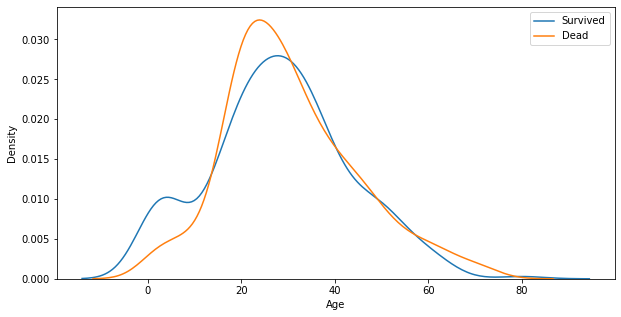

In [16]:
# Suvived 1, 0 과 Age의 경향성

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=titanic_df[titanic_df['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df['Survived'] == 0]['Age'], ax=ax)

plt.legend(['Survived', 'Dead'])

plt.show()

여기까지는 단일 요소와 Survived에 대한 단일 비교를 해보았다.

복합적인 요소에도 분석을 할 수 있다.
👇

### Appendix I. Sex + Pclass vs Survived

- 복합적인 요소를 표현할 때에는 catplot을 많이 사용!

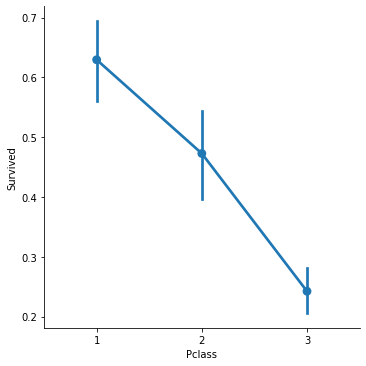

In [92]:
sns.catplot(x='Pclass', y='Survived', kind='point', data=titanic_df)

plt.show()

In [ ]:
hue 옵션을 추가하면 특정 컬럼을 기준으로 나눠서 파악하기 용이하다!

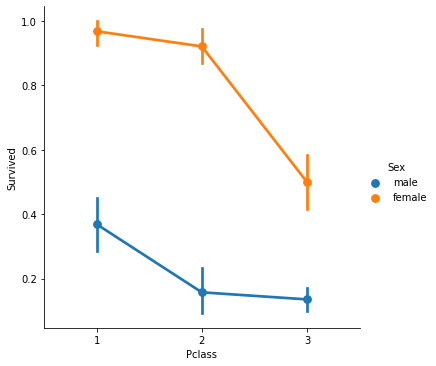

In [93]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=titanic_df)

plt.show()

그래프는 pclass 별 생존자에 대한 추정치를 나타냄

👉 pclass가 높을 수록 생존자인 비율이 더 높다!

### Appendix II. Age + Pclass

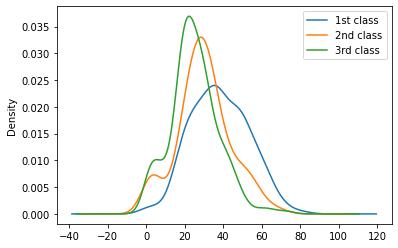

In [99]:
# Age graph with Pclass

titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind='kde')

plt.legend(['1st class', '2nd class', '3rd class'])

plt.show()

👉 클래스가 높은 등급일수록 나이대가 높다!

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?


In [1]:
# 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 데이터 블러오기
# 동일 경로에 "train.csv"가 있는 경우

titanic_df = pd.read_csv("./train.csv")

1) SibSp + Fare  
  👉 형제자매나 배우자를 포함해서 3명이서 온 사람들 중에서 요금을 많이 지불한 사람이 많다.

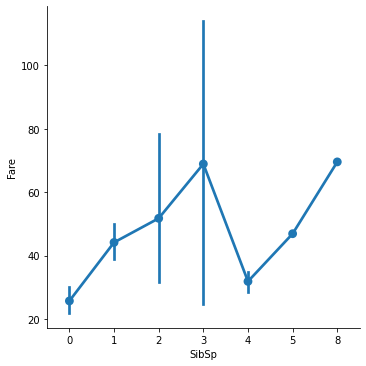

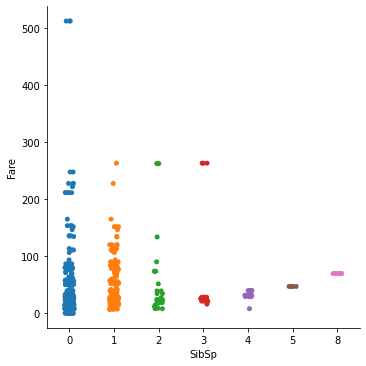

In [82]:
# print(titanic_df.groupby(['SibSp'])['Fare'].min())
# print(titanic_df.groupby(['SibSp'])['Fare'].max())
# print(titanic_df.groupby(['SibSp'])['Fare'].sum())

sns.catplot(x='SibSp', y='Fare', kind='point', data=titanic_df)
plt.show()

2) SibSp + Survived  
  👉 2명 이하의 가족 단위로 온 사람들이 대체적으로 많이 생존했다.

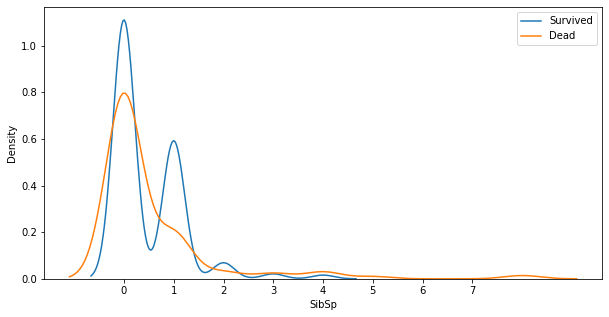

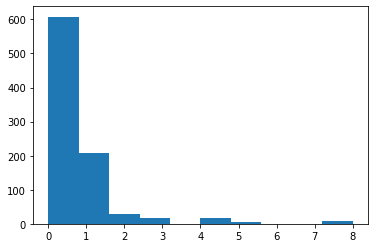

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=titanic_df[titanic_df['Survived'] == 1]['SibSp'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df['Survived'] == 0]['SibSp'], ax=ax)

plt.legend(['Survived', 'Dead'])
plt.xticks(np.arange(0,8,1))

plt.show()

3) Fare + Age  
👉 30대 중반과 60대 중반 사람들이 요금을 많이 지불했다.

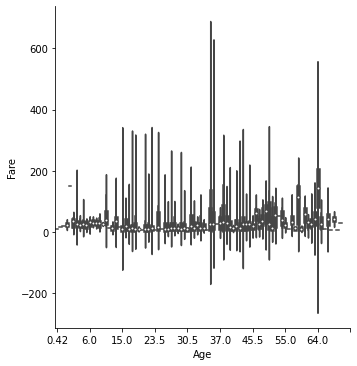

In [145]:
# len(titanic_df['Age'].value_counts())

sns.catplot(x='Age', y='Fare', kind='violin', data=titanic_df)
plt.xticks(np.arange(0, 100, 10))
plt.show()

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

0. 라이브러리, 데이터 불러오기
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

In [192]:
# 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline # default!

# 데이터 블러오기

bc_df = pd.read_csv("./BankChurners.csv")

#### 1. 분석의 목적과 변수 확인  🔎

🤔 어떤 고객들이 카드를 해지할까?

💡 열이 너무 많으므로 14열까지만 가지고 분석하자!

In [162]:
bc_df.iloc[:, :15].head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0


In [163]:
bc_df.iloc[:, :15].columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal'],
      dtype='object')

- CLIENTNUM : 고객번호
- Attrition_Flag : 계좌 해지 여부
- Customer_Age : 나이
- Gender : 성별
  - M=Male, F=Female
- Dependent_count : 부양 가족 수
- Education_Level : 학력
  - high school, college graduate, etc.
- Marital_Status : 결혼 여부
  - Married, Single, Divorced, Unknown
- Income_Category : 소득 분류
  - < \\$40K, \\$40K - 60K, \\$60K - \\$80K, \\$80K-\\$120K, \\$120K >
- Card_Category : 카드 등급
  - Blue, Silver, Gold, Platinum
- Months_on_book : 은행과의 관계 기간
- Total_Relationship_Count : 은행의 제품 수
- Months_Inactive_12_mon : 지난 12개월 동안 비활성 상태인 개월 수
- Contacts_Count_12_mon : 지난 12개월 동안 활동한 개월 수
- Credit_Limit : 신용카드 한도
- Total_Revolving_Bal : 신용카드 잔액
- ...

#### 2. 데이터 전체적으로 살펴보기🔎

🔥  
상관계수는 문자열 컬럼을 제외한 수치형 데이터만 보여준다.

그래서 문자열로 구성된 기준이 되는 계좌 해지 여부(Attrition_Flag) 컬럼을 보여주지 않는다.

따라서 문자열을 숫자형으로 바꿔서 다시 보자!

In [194]:
flag_unique = bc_df['Attrition_Flag'].unique()

print(flag_unique)

bc_df['Attrition_Flag'] = \
bc_df['Attrition_Flag'].map({flag:i for i, flag in enumerate(flag_unique)})

print(bc_df['Attrition_Flag'].isnull().sum())

['Existing Customer' 'Attrited Customer']
0


- Existing Customer : 0
- Attrited Customer : 1

In [195]:
bc_df.describe().iloc[:, :6]

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325960,2.346203,35.928409,3.812580
std,3.690378e+07,0.367235,8.016814,1.298908,7.986416,1.554408
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000
25%,7.130368e+08,0.000000,41.000000,1.000000,31.000000,3.000000
50%,7.179264e+08,0.000000,46.000000,2.000000,36.000000,4.000000
75%,7.731435e+08,0.000000,52.000000,3.000000,40.000000,5.000000
max,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000


In [197]:
bc_df.describe().iloc[:, 6:10]

,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal
count,10127.000000,10127.000000,10127.000000,10127.000000
mean,2.341167,2.455317,8631.953698,1162.814061
std,1.010622,1.106225,9088.776650,814.987335
min,0.000000,0.000000,1438.300000,0.000000
25%,2.000000,2.000000,2555.000000,359.000000
50%,2.000000,2.000000,4549.000000,1276.000000
75%,3.000000,3.000000,11067.500000,1784.000000
max,6.000000,6.000000,34516.000000,2517.000000


- Attrition_Flag -> 평균이 0.16이므로 카드를 해지하는 고객이 굉장히 적다.
- Customer_Age -> 40대의 고객이 많다.
- Dependent_count -> 평균 2.3, 최대 5명
- Months_on_book -> 평균 35개월, 최소 13 최대 56
- Total_Relationship_Count -> 평균 3.8, 최소 1 최대 6
- Months_Inactive_12_mon -> 평균 2.3, 최소 0, 최대 6
- Contacts_Count_12_mon -> 평균 2.4, 최소 0, 최대 6
- Credit_Limit -> 평균 8631.95, 편차 9088
  - 값들이 굉장히 넓게 분포되어있다. (이상치 존재 가능성)
- Total_Revolving_Bal -> 평균 1162
- ...

In [189]:
# 상관계수 확인
bc_df.corr().iloc[:10, :10]

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal
CLIENTNUM,1.000000,-0.046430,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825
Attrition_Flag,-0.046430,1.000000,0.018203,0.018991,0.013687,-0.150005,0.152449,0.204491,-0.023873,-0.263053
Customer_Age,0.007613,0.018203,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780
Dependent_count,0.006772,0.018991,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688
Months_on_book,0.134588,0.013687,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623
Total_Relationship_Count,0.006907,-0.150005,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726
Months_Inactive_12_mon,0.005729,0.152449,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210
Contacts_Count_12_mon,0.005694,0.204491,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913
Credit_Limit,0.005708,-0.023873,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493
Total_Revolving_Bal,0.000825,-0.263053,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000


👉 데이터 살펴보기
- Atrrition_Flag -> 수치에 따른 카드 해지 가능성
  - Total_Relationship_Count
    - 보유한 제품 수가 **적을 수록** 해지하는 고객이 많을 수 있다.
  - Months_Inactive_12_mon
    - 지난 12개월 동안 비활성 상태인 개월 수가 **높을 수록** 해지하는 고객이 많을 수 있다.
  - Contacts_Count_12_mon
    - 지난 12개월 동안 활동한 개월 수가 **높을 수록** 해지하는 고객이 많을 수 있다.
  - Total_Revolving_Bal
    - 신용카드 잔액이 **적을 수록** 해지하는 고객이 많을 수 있다.
  
- Customer_Age - Months_on_book
  - 나이가 **많을 수록** 은행과의 관계 기간이 **길다**.

In [164]:
# 결측치 확인
bc_df.iloc[:, :15].isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
dtype: int64

👉 다행히(?) 결측치는 어떠한 컬럼에도 존재하지 않는다.

#### 3. 데이터의 개별속성 파악하기🔎

##### Attrition_Flag

In [198]:
bc_df['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

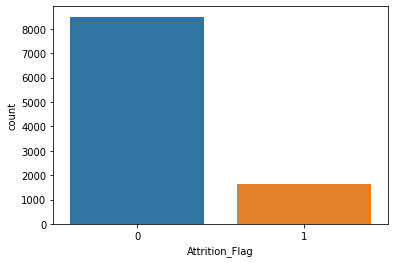

In [199]:
sns.countplot(x='Attrition_Flag', data=bc_df)
plt.show()

👉 해지하지 않은 고객의 데이터가 더 많다.

##### Customer_Age

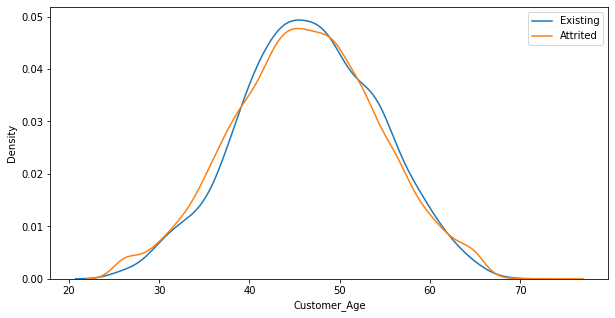

In [238]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=bc_df[bc_df['Attrition_Flag'] == 1]['Customer_Age'], ax=ax)
sns.kdeplot(x=bc_df[bc_df['Attrition_Flag'] == 0]['Customer_Age'], ax=ax)

plt.legend(['Existing', 'Attrited'])

plt.show()

👉  
- 40대와 50대 중반에서 60대초반까지는 해지하지 않는 고객이 많고,
- 20, 30대와 50대 초반, 그리고 60대 중반은 해지하는 고객이 많다.

##### Gender

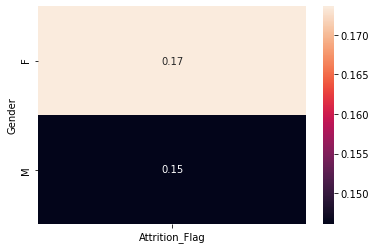

In [236]:
sns.heatmap(bc_df[['Attrition_Flag', 'Gender']].groupby(['Gender']).mean(), annot = True)
plt.show()

👉 해지하는 고객의 비율은 남성보다 여성이 더 많다.

##### Card_Category

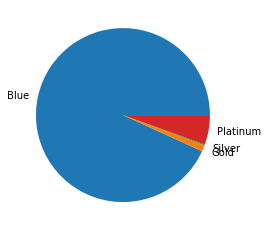

In [280]:
plt.pie(bc_df.groupby(['Card_Category'])['Attrition_Flag'].count(), 
        labels=bc_df['Card_Category'].unique())

plt.show()

In [ ]:
👉 Blue 등급을 이용하는 고객이 압도적으로 많다.

#### ⭐ 가설 세우기
- 상관계수에 따른 가설
1. 보유한 제품 수가 적을 수록 해지하는 고객이 많을 것이다.
2. 지난 12개월 동안 비활성 상태인 개월 수가 높을 수록 해지하는 고객이 많을 것이다.
3. 신용카드 잔액이 적을 수록 해지하는 고객이 많을 수 있다.

- 개인적인 가설
4. 소득 분류가 낮을 수록 해지하는 비율이 많을 것이다.
5. 카드의 등급이 높을 수록 해지하는 비율이 많을 것이다.

##### 1. 보유한 제품 수가 적을 수록 해지하는 고객이 많을 것이다.

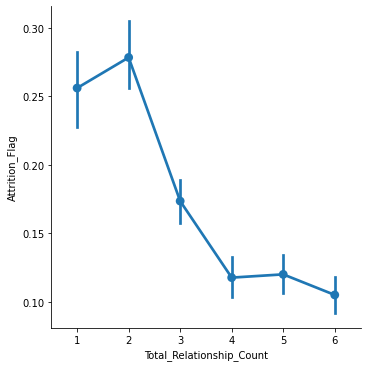

In [353]:
sns.catplot(x='Total_Relationship_Count', y='Attrition_Flag', kind='point', data=bc_df)

plt.show()

⭕ 보유한 제품이 많아질 수록 해지하는 고객이 적어진다.

#####  2. 지난 12개월 동안 비활성 상태인 개월 수가 높을 수록 해지하는 고객이 많을 것이다.

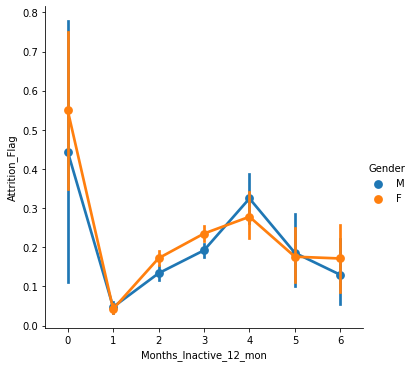

In [321]:
sns.catplot(x='Months_Inactive_12_mon', y='Attrition_Flag', hue='Gender', kind='point', data=bc_df)

plt.show()

🔺 
- 지난 12개월 동안 비활성 상태인 개월 수가 1~4 구간에서는 높아지면 해지하는 고객의 비율이 늘어나지만,
- 그 이후로는 오히려 감소한다.

#####  3. 신용카드 잔액이 적을 수록 해지하는 고객이 많을 수 있다.

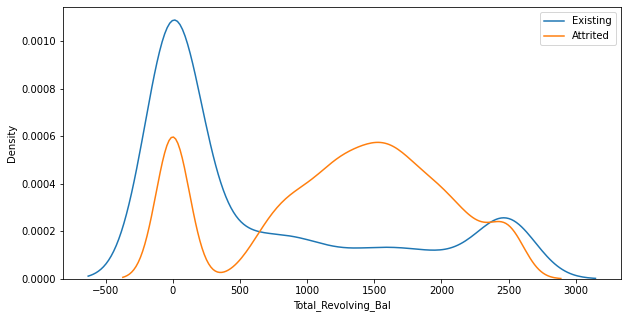

In [354]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=bc_df[bc_df['Attrition_Flag'] == 1]['Total_Revolving_Bal'], ax=ax)
sns.kdeplot(x=bc_df[bc_df['Attrition_Flag'] == 0]['Total_Revolving_Bal'], ax=ax)

plt.legend(['Existing', 'Attrited'])

plt.show()

❌ 오히려 잔액이 많을 수록 해지하는 고객이 많다.

#####  4. 소득 분류가 낮을 수록 해지하는 비율이 많을 것이다.

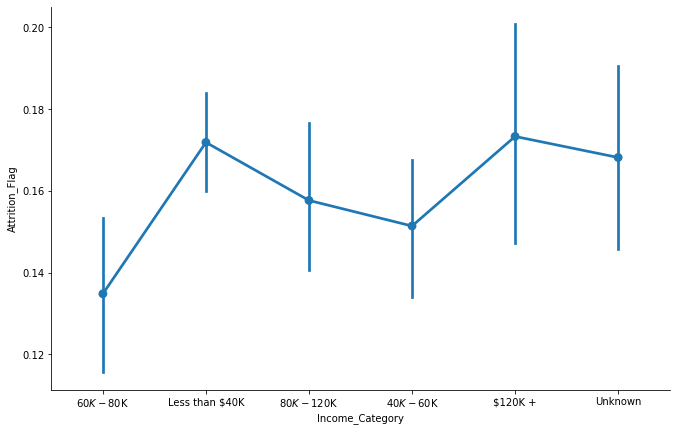

In [362]:
ax = sns.catplot(x='Income_Category', y='Attrition_Flag', kind='point', data=bc_df)
ax.fig.set_size_inches(10, 6)

plt.show()

In [ ]:
❌ 소득 분류와 상관이 없어보인다.

##### 5. 카드의 등급이 높을 수록 해지하는 비율이 많을 것이다.

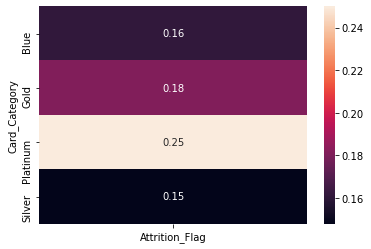

In [349]:
sns.heatmap(bc_df[['Attrition_Flag', 'Card_Category']].groupby('Card_Category').mean(), annot = True)

plt.show()

⭕ 카드의 등급이 가장 높은 Platinum 의 해지 비율이 가장 높다.